In [5]:
from Envs.cglobal import DynEnv
import Learn.agents as ag
from Learn.utils import plot, ReplayBuffer
from tqdm import tqdm
import numpy as np
from IPython.display import clear_output
import matplotlib.pyplot as plt

In [6]:
env = DynEnv()
action_dim = 2**env.action_number
state_dim = env.observation_space

In [16]:
dqn = ag.ActorCritic(state_dim, action_dim, alpha=3e-4)
memory = ReplayBuffer(100000)

In [17]:
BATCH_SIZE = 128
TARGET_UPDATE = 100
MAX_EPISODES = 5000
MAX_STEPS = 1000
TAU = 0.001

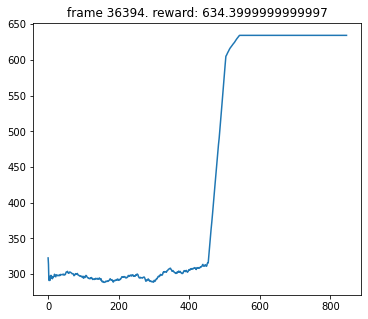

 17%|███████████████████████▏                                                                                                                 | 847/5000 [07:55<50:17,  1.38it/s]


 ep_length:  58.0

 actions:  [1, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7]


 17%|███████████████████████▏                                                                                                                 | 847/5000 [07:55<38:50,  1.78it/s]


KeyboardInterrupt: 

In [18]:
rewards = []
mean_rewards = []
frame_idx = 0
ep_len = []
actions = np.zeros(action_dim)

for episodes in tqdm(range(MAX_EPISODES)):
    state = env.reset()
    episode_reward = 0
    trajectory = []
    for steps in range(MAX_STEPS):
        if episodes>50:
            action = (dqn.get_action(state))
        else:
            action = np.random.choice(action_dim)
            
        next_state, reward, done, = env.step(action)
        
        episode_reward += reward
        
        memory.push(state, action, reward, next_state, done)
        
        state = next_state
        
        frame_idx += 1 
        actions[action] += 1
        trajectory.append(int(action))
        
        if memory.__len__() > BATCH_SIZE:
            sample = memory.sample(BATCH_SIZE)
            dqn.update(sample)
        if done:
            break
            
    ep_len.append(steps)       
    rewards.append(episode_reward)
    mean_rewards.append(np.mean(rewards[-50:]))
#     if episodes % TARGET_UPDATE == 0:
#         dqn.target_net.load_state_dict(dqn.policy_net.state_dict()) 
        
    if frame_idx % 100:
        plot(frame_idx, mean_rewards)
        if frame_idx%1000:
            print('\n ep_length: ',np.mean(ep_len[-50:]))
            print('\n actions: ', trajectory)